# Bicycle Sharing Demand:


### Problem Statement:

 A US bicycle sharing supplier BoomBikes has as of late experienced significant dunks in their incomes. They have gotten a counseling organization to comprehend the variables on which the interest for these common bicycles depends. In particular, they need to comprehend the elements influencing the interest for these common bicycles in the American market. The organization needs to know:
 
 * Which factors are huge in foreseeing the interest for shared bicycles.
 * How well those factors portray the bicycle requests

You are expected to demonstrate the interest for imparted bicycles to the accessible autonomous factors. It will be utilized by the administration to see how precisely the requests shift with various highlights. They can in like manner control the business methodology to fulfill the need levels and measure up to the client's assumptions. Further, the model will be a decent way for the executives to get the interest elements of another market.
  


## Importing Libraries:


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

from math import sqrt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
bike_df=pd.read_csv("day.csv")

In [4]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike_df.shape

(730, 16)

In [6]:
bike_df.size

11680

In [7]:
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
bike_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [9]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
bike_df.axes

[RangeIndex(start=0, stop=730, step=1),
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'casual', 'registered', 'cnt'],
       dtype='object')]

In [11]:
bike_df.ndim

2

In [12]:
bike_df.isnull().value_counts(normalize=False)

instant  dteday  season  yr     mnth   holiday  weekday  workingday  weathersit  temp   atemp  hum    windspeed  casual  registered  cnt  
False    False   False   False  False  False    False    False       False       False  False  False  False      False   False       False    730
dtype: int64

In [13]:
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
bike_df.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

In [15]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


when you see that the difference between the mean median of the data is almost same then we can conclude that there might be no outliers in the data


### Visualisation of Numeric Variables: 

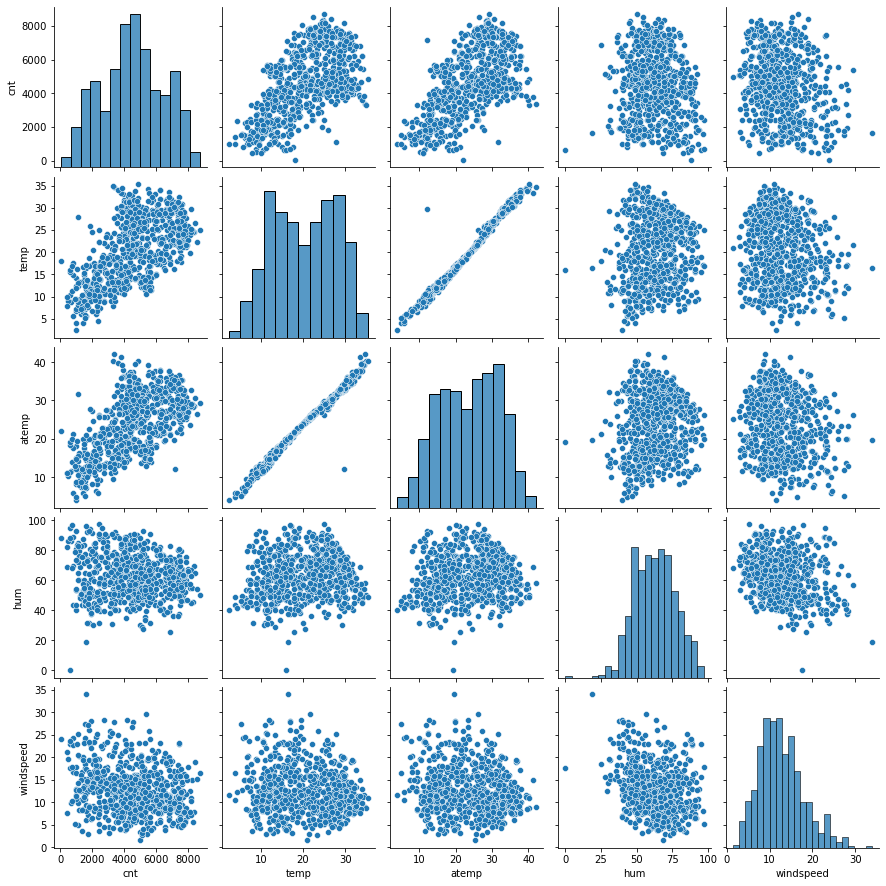

In [16]:
sns.pairplot(data=bike_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

### Visualisation of Categorical Variable: 

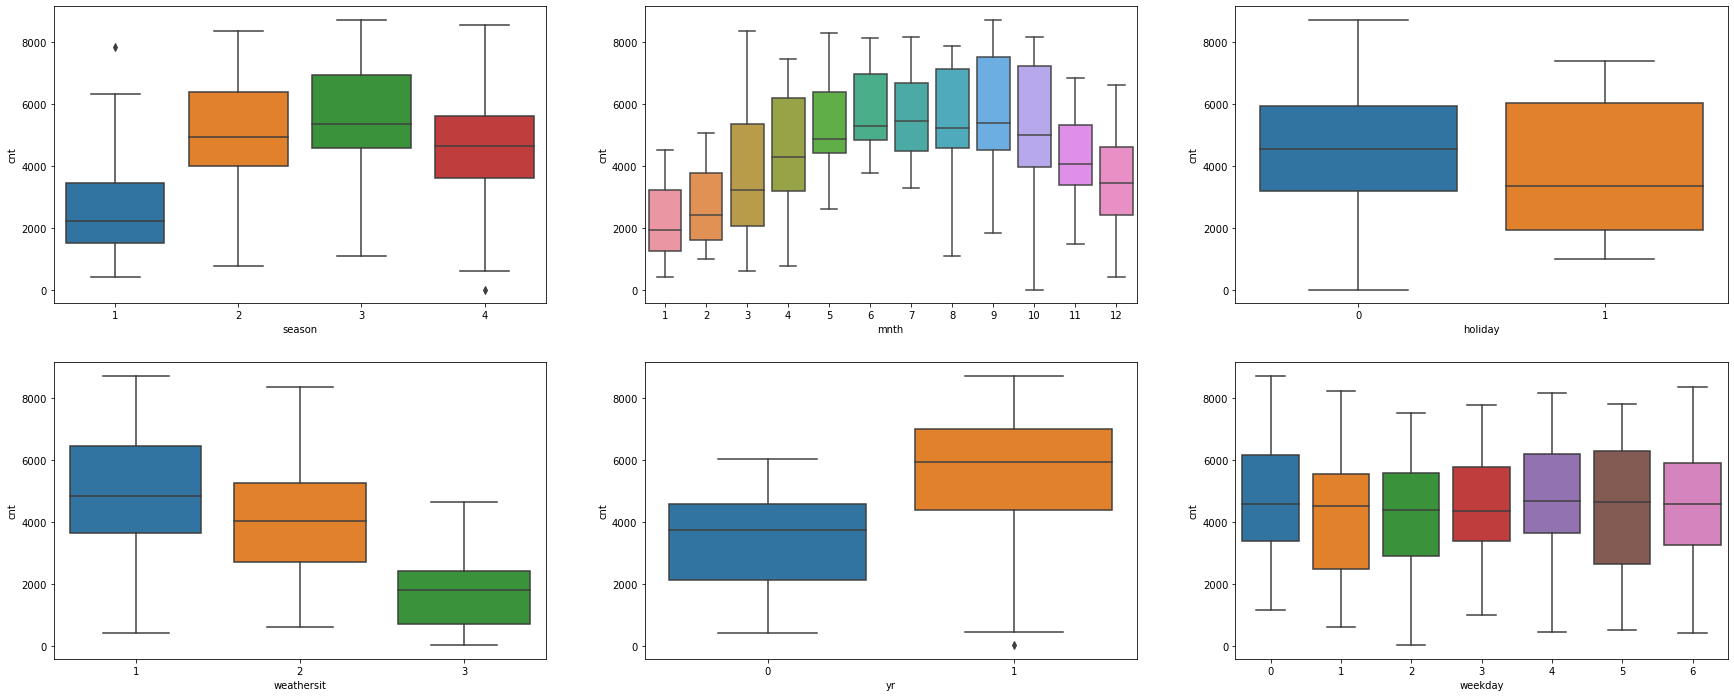

In [17]:
plt.figure(figsize=(30, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data =  bike_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data =  bike_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data =  bike_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data =  bike_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data =  bike_df)
plt.show()

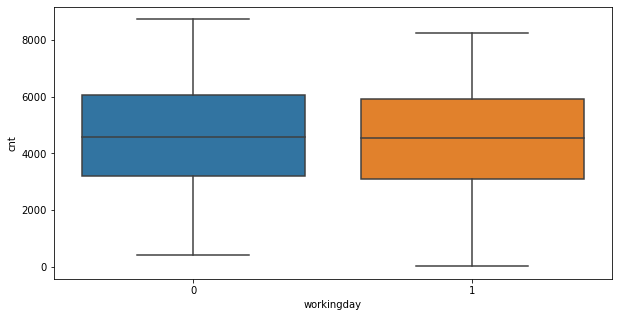

In [18]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'workingday', y = 'cnt',data = bike_df)
plt.show()

* The count of bicycle sharing is least for spring
* The quantity of bicycle shares increased in 2019
* The cnt has no qualities for climate circumstance - 'Heavy Rainfall + Ice Beds + Thunderstorm + Fog, Snow + Fog'(cat no 4)
* The cnt values expansions in late spring months
* The cnt values ars less during occasions

### Data Preparation

In [19]:
## dropping columns that are irrelevant for the model - 
bike_df.drop(['instant','dteday','casual','registered'],axis = 1,inplace = True)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [20]:
import calendar
bike_df['mnth'] = bike_df['mnth'].apply(lambda x: calendar.month_abbr[x])

In [21]:
bike_df.season = bike_df.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})
bike_df.weathersit = bike_df.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})
bike_df.weekday = bike_df.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [22]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Monday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tuesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thrusday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Dummy Variables: 

In [23]:
### creating dummy variables for season , mnth ,weathersit ,weekday
dummy_df = bike_df[['season','mnth','weekday','weathersit']]

In [24]:
dummy_df = pd.get_dummies(dummy_df,drop_first=True )

In [25]:
bike_df = pd.concat([dummy_df,bike_df],axis = 1)

In [26]:
bike_df.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tuesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Thrusday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [27]:
## dropping columns for which dummy variables were created
bike_df.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)

In [28]:
bike_df.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [29]:
bike_df.size

21900

In [30]:
bike_df.shape

(730, 30)

In [31]:
bike_df.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.246575,0.252055,0.243836,0.084932,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,...,0.028767,0.336986,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.431313,0.434490,0.429689,0.278971,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,...,0.167266,0.473004,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


### Preparing Train and Test Sets: 

Spliting the Data into Train set and Test set  is the First Step in Performing Regression.

In [32]:
train, test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)


In [33]:
scal = MinMaxScaler()

In [34]:
num_vars = ['cnt','hum','windspeed','temp','atemp']

train[num_vars] = scal.fit_transform(train[num_vars])

In [35]:
train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [36]:
train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.029412,0.343137,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.169124,0.475223,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 510 non-null    uint8  
 1   season_Summer                 510 non-null    uint8  
 2   season_Winter                 510 non-null    uint8  
 3   mnth_Aug                      510 non-null    uint8  
 4   mnth_Dec                      510 non-null    uint8  
 5   mnth_Feb                      510 non-null    uint8  
 6   mnth_Jan                      510 non-null    uint8  
 7   mnth_Jul                      510 non-null    uint8  
 8   mnth_Jun                      510 non-null    uint8  
 9   mnth_Mar                      510 non-null    uint8  
 10  mnth_May                      510 non-null    uint8  
 11  mnth_Nov                      510 non-null    uint8  
 12  mnth_Oct                      510 non-null    uint8  
 13  mnth

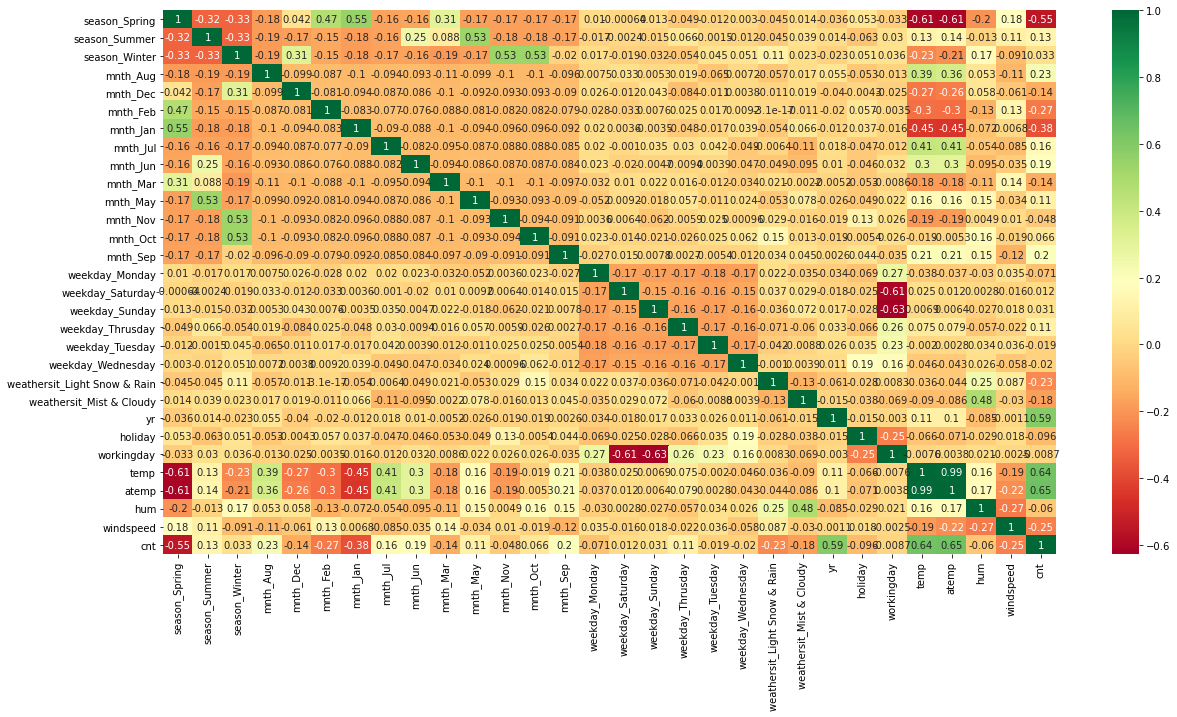

In [38]:
plt.figure(figsize = (20, 10))
sns.heatmap(train.corr(), annot = True, cmap="RdYlGn")
plt.show()

### Dividing the set into X and y:

In [39]:
y_train = train.pop('cnt')
X_train = train

In [40]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 13)            
rfe = rfe.fit(X_train, y_train)

In [41]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 12),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 16),
 ('mnth_Mar', False, 17),
 ('mnth_May', False, 9),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 14),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 11),
 ('weekday_Saturday', False, 6),
 ('weekday_Sunday', False, 7),
 ('weekday_Thrusday', False, 15),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 13),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('hum', True, 1),
 ('windspeed', True, 1)]

### Beginning with every one of the segments chose by RFE

### MODEL- 1

In [42]:
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'holiday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [43]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thrusday', 'weekday_Tuesday',
       'weekday_Wednesday', 'workingday', 'atemp'],
      dtype='object')

In [44]:
X_train_rfe = X_train[col]

In [53]:
X_train_rfe.head()

,const,season_Spring,season_Summer,season_Winter,mnth_Jan,mnth_Jul,mnth_Sep,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,temp,hum,windspeed
653,1.0,0,0,1,0,0,0,0,0,1,0,0.509887,0.575354,0.300794
576,1.0,0,0,0,0,1,0,0,0,1,0,0.815169,0.725633,0.264686
426,1.0,1,0,0,0,0,0,0,1,1,0,0.442393,0.640189,0.255342
728,1.0,1,0,0,0,0,0,0,0,1,0,0.245101,0.498067,0.663106
482,1.0,0,1,0,0,0,0,0,1,1,0,0.395666,0.504508,0.188475


In [45]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [46]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [47]:
lm.params

const                           0.295720
season_Spring                  -0.051791
season_Summer                   0.049088
season_Winter                   0.093078
mnth_Jan                       -0.033102
mnth_Jul                       -0.055924
mnth_Sep                        0.082481
weathersit_Light Snow & Rain   -0.240539
weathersit_Mist & Cloudy       -0.054123
yr                              0.230076
holiday                        -0.096813
temp                            0.512685
hum                            -0.166542
windspeed                      -0.187088
dtype: float64

In [60]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          4.45e-190
Time:                        21:59:38   Log-Likelihood:                 511.29
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2957      0.035      8.466      0.000       0.227       0.364
season_Spring                   -0.0518      0.021     -2.472      0.014      -0.093      -0.011
season_Summer                    0.0491      0.015      3.259      0.001       0.019       0.079
season_Winter                    0.0931      0.017      5.324      0.000       0.059       0.127
mnth_Jan                        -0.0331      0.018     -1.881      0.061      -0.068       0.001
mnth_Jul                        -0.0559      0.018     -3.056      0.002      -0.092      -0.020
mnth_Sep                         0.0825      0.017      4.940      0.000       0.050       0.115
weathersit_Light Snow & Rain    -0.2405      0.026     -9.135      0.000      -0.292      -0.189
weathersit_Mist & Cloudy        -0.0541      0.010     -5.159      0.000      -0.075      -0.034
yr                               0.2301      0.008     28.348      0.000       0.214       0.246
holiday                         -0.0968      0.026     -3.796      0.000      -0.147      -0.047
temp                             0.5127      0.035     14.720      0.000       0.444       0.581
hum                             -0.1665      0.038     -4.410      0.000      -0.241      -0.092
windspeed                       -0.1871      0.026     -7.243      0.000      -0.238      -0.136
==============================================================================
Omnibus:                       58.682   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.185
Skew:                          -0.624   Prob(JB):                     1.20e-29
Kurtosis:                       5.171   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          4.45e-190
Time:                        21:50:14   Log-Likelihood:                 511.29
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [66]:
X_train_new = X_train_rfe.drop(['hum'], axis=1)

In [69]:
X_train_lm = sm.add_constant(X_train_new)

In [70]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [71]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          3.97e-187
Time:                        22:07:44   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2155      0.030      7.096      0.000       0.156       0.275
season_Spring                   -0.0615      0.021     -2.898      0.004      -0.103      -0.020
season_Summer                    0.0422      0.015      2.766      0.006       0.012       0.072
season_Winter                    0.0771      0.017      4.424      0.000       0.043       0.111
mnth_Jan                        -0.0380      0.018     -2.125      0.034      -0.073      -0.003
mnth_Jul                        -0.0507      0.019     -2.728      0.007      -0.087      -0.014
mnth_Sep                         0.0762      0.017      4.500      0.000       0.043       0.110
weathersit_Light Snow & Rain    -0.2864      0.025    -11.623      0.000      -0.335      -0.238
weathersit_Mist & Cloudy        -0.0807      0.009     -9.222      0.000      -0.098      -0.063
yr                               0.2342      0.008     28.524      0.000       0.218       0.250
holiday                         -0.0973      0.026     -3.747      0.000      -0.148      -0.046
temp                             0.4728      0.034     13.803      0.000       0.405       0.540
windspeed                       -0.1549      0.025     -6.140      0.000      -0.205      -0.105
==============================================================================
Omnibus:                       59.984   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.130
Skew:                          -0.637   Prob(JB):                     2.75e-30
Kurtosis:                       5.187   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,55.94
1,season_Spring,5.03
11,temp,3.62
3,season_Winter,3.44
2,season_Summer,2.61
4,mnth_Jan,1.56
5,mnth_Jul,1.48
6,mnth_Sep,1.29
12,windspeed,1.11
7,weathersit_Light Snow & Rain,1.05


In [73]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [74]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,5.13
11,windspeed,4.61
0,season_Spring,2.75
1,season_Summer,2.22
8,yr,2.07
2,season_Winter,1.79
3,mnth_Jan,1.61
4,mnth_Jul,1.59
7,weathersit_Mist & Cloudy,1.56
5,mnth_Sep,1.34


In [75]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_lm).fit()  

In [76]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          3.97e-187
Time:                        22:09:06   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [77]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,5.13
11,windspeed,4.61
0,season_Spring,2.75
1,season_Summer,2.22
8,yr,2.07
2,season_Winter,1.79
3,mnth_Jan,1.61
4,mnth_Jul,1.59
7,weathersit_Mist & Cloudy,1.56
5,mnth_Sep,1.34


### Residual Analysis: 

In [78]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

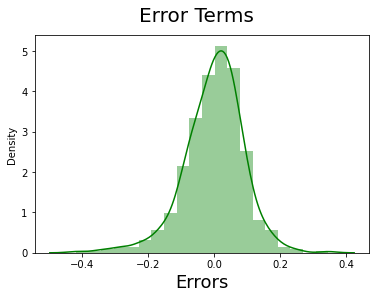

In [81]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20,color='g')
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)   

### Making Predictions Utilizing the Last Model:

### Scaling: 

In [83]:
num_vars = ['cnt','hum','windspeed','temp','atemp']


test[num_vars] = scal.transform(test[num_vars])

In [84]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 219 non-null    uint8  
 1   season_Summer                 219 non-null    uint8  
 2   season_Winter                 219 non-null    uint8  
 3   mnth_Aug                      219 non-null    uint8  
 4   mnth_Dec                      219 non-null    uint8  
 5   mnth_Feb                      219 non-null    uint8  
 6   mnth_Jan                      219 non-null    uint8  
 7   mnth_Jul                      219 non-null    uint8  
 8   mnth_Jun                      219 non-null    uint8  
 9   mnth_Mar                      219 non-null    uint8  
 10  mnth_May                      219 non-null    uint8  
 11  mnth_Nov                      219 non-null    uint8  
 12  mnth_Oct                      219 non-null    uint8  
 13  mnth

In [85]:
test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.027397,0.319635,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.163612,0.467403,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


### Dividind X_test set and y_test set:

In [86]:
y_test = test.pop('cnt')
X_test = test

In [87]:
X_test = sm.add_constant(X_test)

In [88]:
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]
X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         219 non-null    float64
 1   season_Spring                 219 non-null    uint8  
 2   season_Summer                 219 non-null    uint8  
 3   season_Winter                 219 non-null    uint8  
 4   mnth_Jan                      219 non-null    uint8  
 5   mnth_Jul                      219 non-null    uint8  
 6   mnth_Sep                      219 non-null    uint8  
 7   weathersit_Light Snow & Rain  219 non-null    uint8  
 8   weathersit_Mist & Cloudy      219 non-null    uint8  
 9   yr                            219 non-null    int64  
 10  holiday                       219 non-null    int64  
 11  temp                          219 non-null    float64
 12  windspeed                     219 non-null    float64
dtypes: f

In [89]:
y_pred = lm.predict(X_test)

In [90]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8022983156745501

In [91]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.00939000126970945

### Evaluation of the Model:

Text(0, 0.5, 'y_pred')

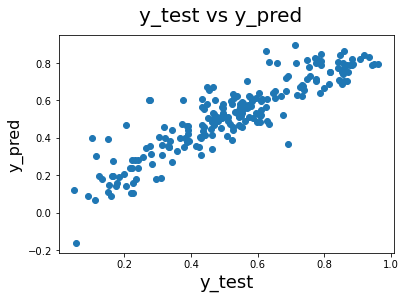

In [92]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)  

In [95]:
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,13))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
11,temp,0.472772
9,yr,0.234197
0,const,0.215488
3,season_Winter,0.077050
6,mnth_Sep,0.076239
2,season_Summer,0.042205
4,mnth_Jan,-0.037996
5,mnth_Jul,-0.050722
1,season_Spring,-0.061504


cnt = 0.215488+ 0.472772 X temp + 0.234197 X yr + 0.077050 X seasonWinter - 0.061504 X season Spring + 0.077050 X season_Winter -0.050722 X mnth_Jul + 0.076239 X mnth_Sep -0.286377 X weathersit_Light Snow & Rain -0.080675 X weathersit_Mist & Cloudy -0.097317 X holiday -0.154925X windspeed

* All of the positive coefficients, such as temp and season Summer, indicate that increasing these values will result in an increase in the value of cnt.
* All of the negative coefficients indicate that increasing these values will result in an increase in the value of cnt.

* Temperature is the most important factor, with the largest coefficient.
* Weathersit Light Snow & Rain comes next.
* Bike rentals are more expensive during the month of September.

* During the holidays, the rentals are reduced.



This shows that the bicycle rentals is significantly impacted by temperature,season and month.